In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append("..")
from basic_tools import *
from resnet_tripAtt import *
print(torch.cuda.is_available())

True


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
learning_rate=0.05
momentum=0.9
weight_decay=0.0001
batch_size=128
start_epoch=0
epochs=10
data_path='./data'
model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
print(device)
model=ResNet_TripAtt(18, 100).to(device)
criterion=nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
trainloader,testloader=get_data_loaders(train_batch_size=batch_size,test_batch_size=batch_size,data_path=data_path)

In [ ]:
train_lossa, test_lossa = [], []
train_acca, test_acca = [], []
train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

In [ ]:
modelpath='../models/'
if not os.path.exists(modelpath):
    os.makedirs(modelpath)
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, modelpath+model_name+'.pth')
start_epoch=epochs

In [ ]:
epochs+=10

model = ResNet_TripAtt(18, 100).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
checkpoint = torch.load(modelpath+model_name+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# train_lossa, test_lossa = [], []
# train_acca, test_acca = [], []
# train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
modelpath='../models/'
torch.save(model.state_dict(),modelpath+model_name+'.pth')
start_epoch=epochs

epoch:10,train_loss:0.6765,train_acc:79.1460,train_top5_acc:96.7020,test_loss:1.2984,test_acc:65.3500,test_top5_acc:89.6500
epoch:11,train_loss:0.5854,train_acc:81.7400,train_top5_acc:97.5620,test_loss:1.3383,test_acc:65.9700,test_top5_acc:89.5100
epoch:12,train_loss:0.5067,train_acc:84.0240,train_top5_acc:98.1820,test_loss:1.3723,test_acc:65.4500,test_top5_acc:89.9500
epoch:13,train_loss:0.4437,train_acc:85.9020,train_top5_acc:98.6800,test_loss:1.3190,test_acc:65.9300,test_top5_acc:89.8600
epoch:14,train_loss:0.3919,train_acc:87.4960,train_top5_acc:98.9720,test_loss:1.3566,test_acc:67.4200,test_top5_acc:90.4900
epoch:15,train_loss:0.3334,train_acc:89.1360,train_top5_acc:99.2860,test_loss:1.3763,test_acc:66.3100,test_top5_acc:90.0500
epoch:16,train_loss:0.2945,train_acc:90.6660,train_top5_acc:99.4740,test_loss:1.4416,test_acc:65.5600,test_top5_acc:89.0500
epoch:17,train_loss:0.2623,train_acc:91.4020,train_top5_acc:99.6180,test_loss:1.4565,test_acc:67.4900,test_top5_acc:90.2900
epoch:18

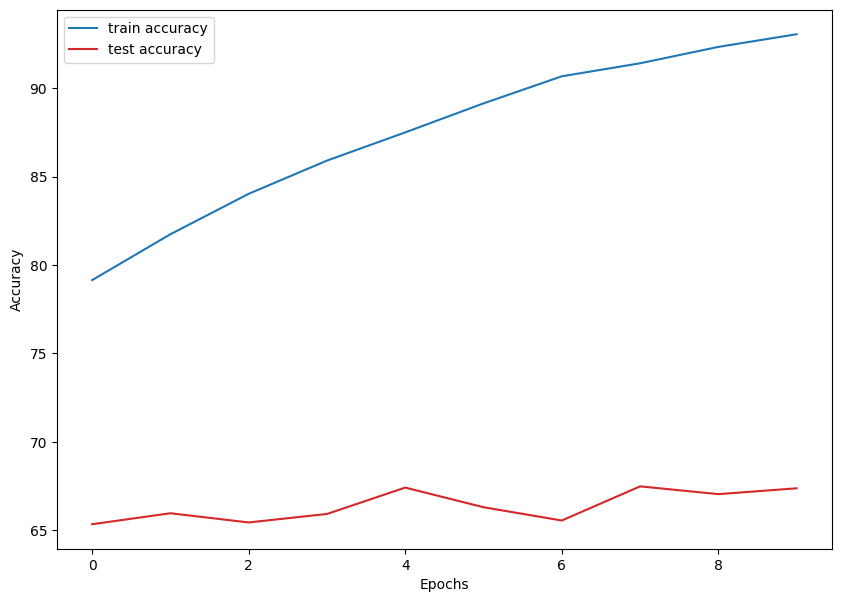

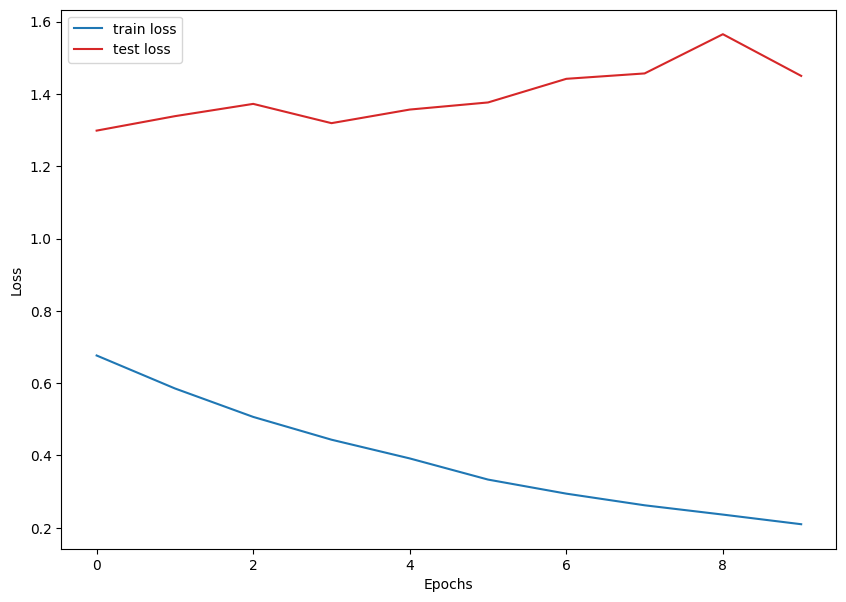

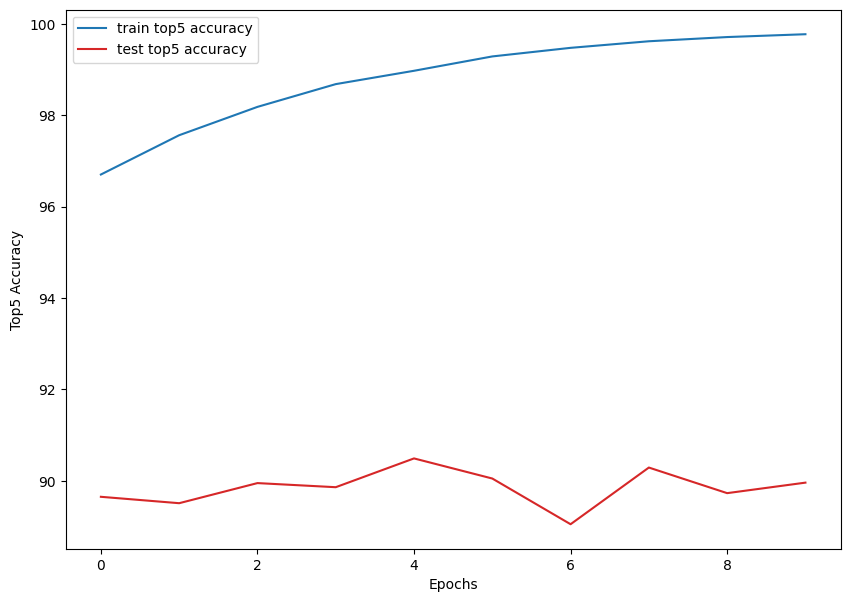

In [20]:
epochs+=10

model = ResNet_TripAtt(18, 100).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
checkpoint = torch.load(modelpath+model_name+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# train_lossa, test_lossa = [], []
# train_acca, test_acca = [], []
# train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
modelpath='../models/'
torch.save(model.state_dict(),modelpath+model_name+'.pth')
start_epoch=epochs